In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [15]:
# Given data sequence
data = [7.7, 10.0, 8.8, 12.1, 7.4, 6.1, 6.1, 6.1, 8.0, 8.8,
        6.1, 10.9, 5.0, 12.6, 11.7, 11.5, 6.4, 8.9, 7.2, 7.2,
        6.5, 10.3, 7.9, 7.8, 14.0, 6.8, 7.7, 7.8, 6.7, 7.7]

For numerical data, researcher will need to first categorise it into two groups based on certain cut-off points. The cut-off points can be obtained from mean, median, mode or by custom (as determined by the researcher). Cases with values less than the cut-off point are categorised in one group while cases with values more than the cut-off point are categorised into another group. In this example, the researcher will use the custom cut-off point of 7, HbA1c < 7 as group 1 indicating good control and HbA1c ≥ 7 as group 2 which indicates poor control. 

In [33]:
# Step 1: Compute the median
# median = np.median(data)
median = 7

In [34]:
# Step 2: Create the binary sequence
binary_sequence = ['+' if x > median else '-' for x in data]

In [35]:
print(binary_sequence)

['+', '+', '+', '+', '+', '-', '-', '-', '+', '+', '-', '+', '-', '+', '+', '+', '-', '+', '+', '+', '-', '+', '+', '+', '+', '-', '+', '+', '-', '+']


In [36]:
# Step 3: Identify the number of runs
runs = 1
for i in range(1, len(binary_sequence)):
    if binary_sequence[i] != binary_sequence[i - 1]:
        runs += 1
        
runs

15

In [37]:
# Number of positive and negative runs
n1 = sum(1 for x in data if x > median)
n2 = sum(1 for x in data if x <= median)

n1, n2

(21, 9)

In [38]:
# Total number of observations
n = len(data)
n

30

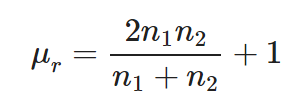

In [39]:
# Step 4: Calculate the expected number of runs and standard deviation
#mu_R    = (2 * n1 * n2) / n + 1
mu_R    = ((2 * n1 * n2) / (n1+n2)) + 1
mu_R

13.6

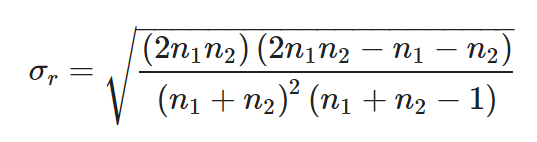

In [42]:
sigma_R = np.sqrt((2 * n1 * n2 * (2 * n1 * n2 - n1 - n2)) / ((n1+n2)**2 * (n1+n2 - 1)))
sigma_R

2.244994432064365

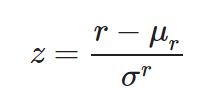

where:

- $r$ is the number of runs;
- $μ_r$ is the expected number of runs; and
- $σ_r$ is the standard deviation of the number of runs.

In [43]:
# Step 5: Compute the test statistic Z
Z = (runs - mu_R) / sigma_R
Z

0.6236095644623237

In [27]:
# Step 6: Determine the critical values and p-value
alpha = 0.05
critical_values = norm.ppf([alpha / 2, 1 - alpha / 2])
p_value = 2 * (1 - norm.cdf(abs(Z)))

In [28]:
# Step 7: Plot the critical values and test statistic
x = np.linspace(-3, 3, 400)
y = norm.pdf(x)

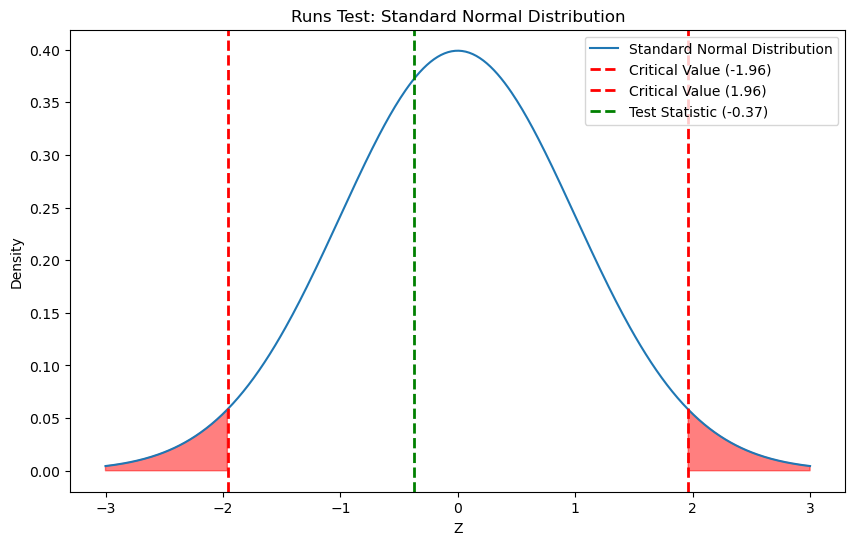

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Standard Normal Distribution')
plt.axvline(critical_values[0], color='r', linestyle='dashed', linewidth=2, label='Critical Value (-1.96)')
plt.axvline(critical_values[1], color='r', linestyle='dashed', linewidth=2, label='Critical Value (1.96)')
plt.axvline(Z, color='g', linestyle='dashed', linewidth=2, label=f'Test Statistic ({Z:.2f})')

plt.fill_between(x, 0, y, where=(x <= critical_values[0]) | (x >= critical_values[1]), color='red', alpha=0.5)
plt.title('Runs Test: Standard Normal Distribution')
plt.xlabel('Z')
plt.ylabel('Density')
plt.legend()
plt.show()

In [30]:
# Print results
print(f"Number of runs: {runs}")
print(f"Expected number of runs (mu_R): {mu_R}")
print(f"Standard deviation of runs (sigma_R): {sigma_R}")
print(f"Test Statistic (Z): {Z}")
print(f"Critical values: {critical_values}")
print(f"P-value: {p_value}")

# Conclusion
if abs(Z) > critical_values[1]:
    print("Reject the null hypothesis: The sequence is not random.")
else:
    print("Fail to reject the null hypothesis: The sequence is random.")

Number of runs: 15
Expected number of runs (mu_R): 16.0
Standard deviation of runs (sigma_R): 2.6909811055347133
Test Statistic (Z): -0.37161167647860327
Critical values: [-1.95996398  1.95996398]
P-value: 0.7101819941675358
Fail to reject the null hypothesis: The sequence is random.
